# L04- Deep Learning Optimizers

- This notebook was prepared for MECE 610: Machine Learning Control in Engineering Application course at the University of Alberta
- The notebook and examples are developed by **Armin Norouzi**

Table of Contents:

-   Deep Learning vs Machine Learning and Shallow Neural Network
-   Deep Learning Optimizer
-   Hands-on example of Optimizer using code from scratch



## Deep Learning



-   which uses deep nerual network as model (DNN) to automatically build a hierarchy of data representation &#x2013; see Figure below
-   the neural network considered so far had one or two hidden layer
    -   these are called shallow neural network
-   To model complex systems, we need more parameter in our model to learn. To do this we have two main options:
    1.  A shallow network that has a low number of hidden layers.
        -   While there are studies that a shallow network can fit any function
        -   it will need to be really tall - this causes a large increase in the number of parameters
    2.  A deep network (wide) has been found to fit functions better with less parameters than a shallow network (tall)



**Deep Neural Networks**


-   For example a deep network with 5 layers and 10 neurons in each layer may work more efficient than a single hidden layer network (shallow NN) with 1000 neurons.
-   Broad application of DNN using Recurrent neural networks (RNNs) in which data can flow in any direction, such as language modeling and Convolutional deep Neural Networks (CNNs) which are used in computer vision. CNNs also have been applied to acoustic modeling for automatic speech recognition
-   In this chapter DNN using Fully connected (FC) network (what we learn so far in shallow neural network- H03) and RNN to model dynamic of system for MPC application

![img](https://github.com/arminnorouzi/ML-developed_course/blob/main/L04_DL/figures/AI_Complete_Graph.jpeg?raw=true)
[Image Reference](https://medium.com/co-learning-lounge/what-is-deep-learning-ai-in-simple-words-ad2c39e13bf2)


-   DNN has advantages listed above
-   DNN also has some challenges that are related to training a much deeper ANN
    -   perhaps with 10 layers or many more, each containing hundreds of neurons
    -   linked by hundreds of thousands of connections.



### Some of the problems of DNN:



1.  Vanishing and exploding gradients:
    -   This is when the gradients grow smaller and smaller
    -   or larger and larger
    -   when flowing backward through the DNN during training
    -   Both vanishing and exploding gradients make lower layers very hard to train.
2.  Not have enough training data
3.  Training may be extremely slow
4.  A model with millions of parameters
    -   at risk of severely overfitting the training set
    -   especially if there are not enough training instances or if they are too noisy.

Next these problems will be examined and possible solution s explored.



-   some conventions are given below from the ML community
-   <span class="underline">Small data set</span>  when the number of data is less than 10000 use a shallow ANN
    -   70% training, 15% validation, and 15% test is often used but is data dependent on the specific data
-   <span class="underline">Big data set</span>  when the number of data is greater than 10000 use a deep ANN  or DNN
    -   98% training, 1% validation, and 1% test is often used but is data dependent on the specific data
    -   in literature 99.5% training , 0.4% validation, and 0.1% test has also been used
-   eliminating the test set (only validation set) can produce acceptable results in DNN \cite{raschka2018model}



### Gradient descent (Batch from before)



Gradient descent is used to train our model 

1.  Batch Gradient Descent
2.  Mini Batch Gradient Descent
3.  Stochastic Gradient Descent

will be discussed in more detail below

![img](https://github.com/arminnorouzi/ML-developed_course/blob/main/L04_DL/figures/1_MpLkcugbeMrJvFlz69LTNQ.jpeg?raw=true)



#### Batch Gradient Descent



-   all the training data is taken into consideration to take a single step
    -   take the average of the gradients of all the training examples
    -   then use that mean gradient to update our parameters
-   Batch Gradient Descent is great for convex systems
    -   then the global minimum can be found
    -   there is a single step of gradient descent in one epoch.
    -   Batch Gradient Descent used in this course so far in training our models



#### Stochastic Gradient Descent (SGD)



-   consider just one data point at a time to take a single step
-   each epoch has the following steps 
    1.  Take a training example (data point)
    2.  Feed it to Neural Network
    3.  Calculate it's gradient
    4.  Use the gradient we calculated in step 3 to update the weights,
    5.  Repeat steps 1&#x2013;4 for all the training examples (data points in training dataset)
-   Since we are considering just one data point at a time the cost
    -   will fluctuate over the training examples
    -   it will not necessarily monotonically decrease.
    -   in the long run, going through the training examples (data points), you will see the cost decreasing with fluctuations.



#### Mini Batch Gradient Descent



-   Motivation for mini batch
    -   Batch Gradient Descent converges directly to minima
    -   but Batch Gradient Descent can converge to a local minimum
    -   SGD converges faster for larger datasets.
    -   SGD uses only one example at a time so no vectorized implementation and thus slow training



-   use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch
    -   this helps tackle converging local minima in batch GD
    -   slow training of SGD
-   mini-batch  is a mixture of Batch GD and SGD
-   Process: create the mini-batches of fixed size
-   then do the following steps in one epoch:
    1.  Pick a mini-batch,
    2.  Feed it to Neural Network
    3.  Calculate the mean gradient of the mini-batch
    4.  Use the mean gradient from step 3 to update the weights,
    5.  Repeat steps 1&#x2013;4 for the mini-batches we created



#### Schematic comparing Batch, Stochastic and mini-Batch gradient descent



![img](https://github.com/arminnorouzi/ML-developed_course/blob/main/L04_DL/figures/1_FXHp55rpDM0tkaD5oz3Dvg.png?raw=true)
[Reference](https://medium.com/analytics-vidhya/gradient-descent-vs-stochastic-gd-vs-mini-batch-sgd-fbd3a2cb4ba4)



-   Batch Gradient Descent: Batch Size = Size of Training Set
-   Stochastic Gradient Descent: Batch Size = One Training Example (data point)
-   Mini-Batch Gradient Descent: 1 $<$ Batch Size $<$ Size of Training Set



-   for mini-batch GD the batch size $m_B$ is usually $2^n$ - like 16, 32, 64, 128, 256, 512, and 1028
-   this is based on effectively using existing computer architecture
-   The most common batch size value is 128 and 256, with 1028 being the largest value chosen for mini-batch size.



### The Vanishing/Exploding Gradients Problems



**Vanishing gradients:**



-   The backpropagation algorithm works by propagating error gradient from the output layer to the input layer,
-   gradients often get smaller and smaller as the algorithm progresses to the lower layers
-   in that case the Gradient Descent update leaves the lower layers' connection weights virtually unchanged



**Exploding gradients:**



-   The gradients can grow bigger and bigger until
    -   layers get very large weight updates and the algorithm diverges
-   This unfortunate behavior was empirically observed in the past
    -   it was one of the reasons deep neural networks were mostly abandoned in the early 2000s.



#### Vanishing/Exploding Gradients Prpblem Definition


When using logistic sigmoid activation function activation function 

-   the weight initialization technique: use a normal distribution with a mean of 0 and a standard deviation of 1
-   this initialization
    -   results in the variance of the outputs of each layer being much greater than the variance of its inputs.
    -   going forward in the network, the variance keeps increasing after each layer until
    -   the activation function saturates at the initial layers.
-   the saturation is made worse due to the logistic function having a mean of 0.5, not 0



#### Glorot and He Initialization



The signal must flow properly in both directions: 

-   in the forward direction when making predictions,
-   in the reverse direction when backpropagating gradients.

The variance of the outputs of each layer needs to be equal to the variance of its inputs, 

-   in addition, need the gradients to have equal variance before and after flowing through a layer in the reverse direction.
-   To do this the connection weights of each layer must be initialized randomly as normal distribution with mean 0 and variance of

$$\sigma^2 = \frac{1}{n_{avg}} = \frac{2}{n_{in} + n_{out}}$$

-   where $n_{in}$ is number of inputs of a layer
-   and $n_{out}$ number of neurons in each layer.
-   This variance is valid for tanh and logistic activation function.
-   For ReLU usually $\sigma^2 = \frac{2}{n_{in}}$ is used.
-   In Matlab Deep Learning Toolbox this initialization method is used as default.
-   Full details of this method are available in \cite{glorot2010understanding}.



#### Non saturating Activation Functions



Other activation functions behave much better in deep neural networks

-   in particular, the ReLU activation function,
    -   mostly because it does not saturate for positive values
    -   it is fast to compute
-   the ReLU activation function is shown in the Figure and defined as

$$\text{ReLU}(z) = max(0, z)$$ 

![img](https://github.com/arminnorouzi/ML-developed_course/blob/main/L04_DL/figures/Relu.PNG?raw=true)



**Problems with ReLU**



-   However the ReLU function has the following problems:
    -   dying ReLUs: during training, some neurons effectively \`\`die,''
    -   meaning they stop outputting anything other than 0.
    -   A neuron dies when its weights get tweaked in such a way that
    -   the weighted sum of its inputs are negative for all instances in the training set.
-   To solve this problem usually leaky ReLU is used.
-   This function is defined as

$$\text{LeakyReLU}(z) = max(\alpha z, z)$$ 
and shown in Figure 

![img](https://github.com/arminnorouzi/ML-developed_course/blob/main/L04_DL/figures/laeky.PNG?raw=true)



**The hyperparameter $\alpha$**



-   defines how much the function "leaks":
-   it is the slope of the function for $z < 0$ and is typically set to 0.01.
-   This small slope ensures that leaky ReLUs never die;
    -   they can go into a long coma, but they have a chance to eventually wake up.
-   Other variants of ReLu are
    -   randomized leaky ReLU (RReLU),
    -   parametric leaky ReLU (PReLU),
    -   exponential linear unit (ELU),
    -   and Scaled ELU (SELU)
-   which are out of scope of this course.



#### Batch Normalization



**Using He initialization along with ReLu can**



-   significantly reduce the danger of the vanishing/exploding gradients problems at the beginning of training,
-   it doesn't guarantee that they will not return during training.



The batch normalization consists of 

1.  adding an operation in the model just before or after the activation function of each hidden layer to zero center and normalizes each input,
2.  then scales and shifts the result using two new parameter vectors per layer: one for scaling, the other for shifting.

In order to zero-center and normalize the inputs, the algorithm needs to

1.  estimate mean and standard deviation of each input
2.  the mean and standard deviation of the input over the current mini-batch is used
    -   hence the name \`\`Batch Normalization''



**Batch Normalization algorithm**



Batch normalization is calculated as with batch size $m_B$:
$$\mu_B = \frac{1}{m_B} \sum_{i=1}^{m_B} x^{(i)}$$
$$\sigma_B^2 = \frac{1}{m_B} \sum_{i=1}^{m_B} (x^{(i)}-\mu_B)^2$$
$$\hat{x}^{(i)} = \frac{ {x}^{(i)}- \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$$
$${z}^{(i)} = \gamma \odot \hat{x}^{(i)} + \nu$$



**Batch Normalization variables**



-   B: the mini-batch number
-   $\hat{x}^{(i)}$: vector of zero-centered and normalized inputs for instance $i$
-   $z^{(i)}$: output of the Batch Normalization operation. It is a rescaled and shifted version of the inputs
-   $\mu_B$: vector of input means, evaluated over the whole minibatch B
-   $\sigma_B$: vector of input standard deviations, also evaluated over the whole mini-batch (it contains one standard deviation per input)
-   $m_B$: number of instances in the mini-batch
-   $\epsilon$: small floating point number to avoid division by zero (typically $1\times10^5$ ). This is called a smoothing term
-   $\gamma$: output scaling parameter vector for the layer (it contains one scale parameter per input)
-   $\nu$:  the output shift (offset) parameter vector for the layer (it contains one offset parameter per input). Each input is offset by its corresponding shift parameter



-   Usually $\beta$ is used in literature instead of $\nu$,
-   as $\beta$ will be used in GD with momentum, here $\nu$ is used instead



## Deep Learning Optimizers



**Faster Optimizers**



Three ways to speed up training that have been discussed are:

1.  He initialization strategy
2.  Proper activation function (ReLu)
3.  Batch Normalization

To significantly boost training speed use: 

-   a faster optimizer than the regular Gradient Descent optimizer.
-   to do this, Gradient Descent With Momentum, Root Mean Squared Propagation (RMSProp), and the Adam optimizer are used



### Gradient Descent With Momentum



**Gradient descent problems**



-   bounces around the search space when
    -   optimization problems that have large amounts of curvature or noisy gradients,
-   can get stuck in flat spots in the search space that have no gradient.



**Momentum is an extension to the gradient descent optimization algorithm**



It allows:

-   the search to build inertia in a direction in the search space
-   overcome the oscillations of noisy gradients
-   \`\`coast'' across flat spots of the search space.



**Momentum Algorithm**



-   accumulates moving average of past gradients and move in that direction,
-   while exponentially decaying.
-   GD is compared with momentum in the Figure



**Accelerates learning, when:**



-   Facing high curvature
-   Small but consistent gradients
-   Noisy gradients
-   Examples of optimizers come later

![img](https://github.com/arminnorouzi/ML-developed_course/blob/main/L04_DL/figures/momentum.PNG?raw=true)

Reference: [1]

**The momentum update rule (recursive)**



The momentum update rule is, 
for $\ell = 1, \ldots, l$; 
$$\begin{cases} v_{dW^{[\ell]}} := \beta v_{dW^{[\ell]}} + (1 - \beta) dW^{[\ell]} \\ 
W^{[\ell]} := W^{[\ell]} - \alpha v_{dW^{[\ell]}} \end{cases}$$
$$\begin{cases} v_{db^{[\ell]}} := \beta v_{db^{[\ell]}} + (1 - \beta) db^{[\ell]} \\ 
b^{[\ell]} := b^{[\ell]} - \alpha v_{db^{[\ell]}} \end{cases}$$

-   $dW^{[\ell]}$ is $\frac{\partial {L} }{\partial W^{[\ell]} }$ and $db^{[\ell]}$ is $\frac{\partial {L} }{\partial b^{[\ell]} }$
-   where $l$ is the number of layers, $\beta$ is the momentum and $\alpha$ is the learning rate.
-   A new hyperparameter $\beta$, called the momentum
    -   must be set between 0 (high friction) and 1 (no friction)
    -   a typical momentum value is 0.9



### Root Mean Squared Propagation, or RMSProp



RMSProp, is an extension of gradient descent that 

-   uses a decaying average of partial gradients in the adaptation of the step size for each parameter
-   uses a decaying moving average allows the algorithm to forget early gradients
-   focuses on the most recently observed partial gradients seen during the progress of the search.



**RMSProp update rule (recursive)**



-   The parameter update rule for RMSProp is

$$\begin{cases} 
s_{dW^{[\ell]}} := \beta_2 s_{dW^{[\ell]}} + (1 - \beta_2) dW^{[\ell]} \odot dW^{[\ell]} \\ 
W^{[\ell]} := W^{[\ell]} - \alpha  \frac{dW^{[\ell]}}{\sqrt{s_{dW^{[\ell]}} + \epsilon}} \end{cases}$$

$$\begin{cases} 
s_{db^{[\ell]}} := \beta_2 s_{db^{[\ell]}} + (1 - \beta_2) db^{[\ell]} \odot db^{[\ell]} \\ 
W^{[\ell]} := W^{[\ell]} - \alpha  \frac{db^{[\ell]}}{\sqrt{s_{dW^{[\ell]}} + \epsilon}} \end{cases}$$

-   $\epsilon$ is hyperparameter preventing division by zero
-   $\beta_2$ Exponential decay hyperparameter for the moment estimates. $\beta_2$ is usually 0.9.
-   Except on very simple problems
    -   this optimizer almost always performs much better than GD
    -   it was the preferred optimization algorithm of many researchers until Adam optimization became prevalent



### Adam Optimization (adaptive moment estimation)



Adam combines the ideas of momentum optimization and RMSProp 

-   just like momentum optimization, it keeps track of an exponentially decaying average of past gradients
-   just like RMSProp, it keeps track of an exponentially decaying average of past squared gradients.

The general update rule for Adam (recursive) is, for $\ell = 1, ..., l$:
$$\begin{cases}
v_{db^{[\ell]}} := \beta_1 v_{db^{[\ell]}} + (1 - \beta_1) db^{[\ell]} \\
v^{corrected}_{db^{[\ell]}} := \frac{v_{db^{[\ell]}}}{1 - (\beta_1)^t} \\
s_{db^{[\ell]}} := \beta_2 s_{db^{[\ell]}} + (1 - \beta_2) (db^{[\ell]} \odot db^{[\ell]}) \\
s^{corrected}_{db^{[\ell]}} := \frac{s_{db^{[\ell]}}}{1 - (\beta_2)^t} \\
b^{[\ell]} := b^{[\ell]} - \alpha \frac{v^{corrected}_{db^{[\ell]}}}{\sqrt{s^{corrected}_{db^{[\ell]}}} + \varepsilon}
\end{cases}$$

-   $\beta_1$:  exponential decay hyperparameter for the first moment estimates
-   $\beta_2$: exponential decay hyperparameter for the second moment estimates,
-   $\epsilon$ hyperparameter preventing division by zero in Adam updates.
-   $v$:  moving average of the first gradient in the Adam rule
-   $s$:  moving average of the squared gradient in the Adam rule
-   for initial values can choose $\beta_1 = 0.9$, $\beta_2 = 0.999$, $\epsilon = 10^{-7}$, and $\alpha = 0.001$.



### Learning Rate Selection



Finding a good learning rate $\alpha$ is very important. 

-   Set it too low,
    -   training will eventually converge to the optimum,
    -   but it will take a very long time.
-   For a limited computing budget,
    -   may have to interrupt training before it has converged properly,
    -   yielding a suboptimal solution





![img](https://github.com/arminnorouzi/ML-developed_course/blob/main/L04_DL/figures/learnrate.png?raw=true)

reference = [1]



### Learning rate change strategies



A constant learning rate can be improved: 

1.  start with a large learning rate
2.  then reduce it once training slows
3.  can reach a good solution faster than with the optimal constant learning rate &#x2013; Figure

-   Strategies to reduce the learning rate during training are called learning schedules.
-   Two common ways of scheduling the learning rate are:



##### Decay on every iteration: exponential learning rate decay



$$\alpha = \left(\frac{1}{1 + \text{decayRate} \times \text{epochNumber}}\right) \alpha_{0}$$



##### Piecewise constant scheduling



-   the new learning rate is calculated using exponential weight decay with fixed interval scheduling

$$\alpha = \left(\frac{1}{1 + \text{decayRate} \times \lfloor\frac{\text{epochNum}}{\text{timeInterval}}\rfloor}\right) \alpha_{0}$$

-   where $\alpha_{0}$ is initial learning rate.



## Hands-on examples



**Import Packages**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

### Gradient Descent - try to use the gradient method from before



-   first create test example function `update_parameters_with_gd_test_case`
-   then perform parameter update with gradient descent `update_parameters_with_gd`
-   initialize the network randomly instead of training - just for testing



In [ ]:
def update_parameters_with_gd_test_case():
    np.random.seed(1)
    learning_rate = 0.01
    W1 = np.random.randn(2,3)
    b1 = np.random.randn(2,1)
    W2 = np.random.randn(3,3)
    b2 = np.random.randn(3,1)

    dW1 = np.random.randn(2,3)
    db1 = np.random.randn(2,1)
    dW2 = np.random.randn(3,3)
    db2 = np.random.randn(3,1)
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    
    return parameters, grads, learning_rate

**Define normal gradient descent**



In [ ]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Update rule for each parameter
    for l in range(1, L + 1):
        parameters["W" + str(l)] =  parameters["W" + str(l)] - learning_rate*(grads['dW' + str(l)])
        parameters["b" + str(l)] =  parameters["b" + str(l)] - learning_rate*(grads['db' + str(l)])  
    return parameters

**Now update parameters and test function**



In [ ]:
parameters, grads, learning_rate = update_parameters_with_gd_test_case()
learning_rate = 0.01
parameters = update_parameters_with_gd(parameters, grads, learning_rate)

print("W1 =\n" + str(parameters["W1"]))
print("b1 =\n" + str(parameters["b1"]))
print("W2 =\n" + str(parameters["W2"]))
print("b2 =\n" + str(parameters["b2"]))

W1 =
[[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 =
[[ 1.74604067]
 [-0.75184921]]
W2 =
[[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 =
[[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]


### Mini-Batch Gradient Descent - define shuffled mini batches



-   not for time series, but can be good for language processing and other



In [ ]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):

    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1, m))
    
    inc = mini_batch_size

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        # (approx. 2 lines)
        # mini_batch_X =  
        # mini_batch_Y =

        mini_batch_X = shuffled_X[:,k*inc:(k+1)*inc] 
        mini_batch_Y = shuffled_Y[:,k*inc:(k+1)*inc]        
        

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:

        mini_batch_X = shuffled_X[:,int(m/mini_batch_size)*inc:]
        mini_batch_Y = shuffled_Y[:,int(m/mini_batch_size)*inc:]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

-   this is just to test



In [ ]:
def random_mini_batches_test_case():
    np.random.seed(1)
    mini_batch_size = 64
    X = np.random.randn(12288, 148)
    Y = np.random.randn(1, 148) < 0.5
    return X, Y, mini_batch_size

-   call `random_mini_batches_test_case` to get \`\`data''
-   then call `random_mini_batches` to get mini-batch sizes and shuffled



In [ ]:
t_X, t_Y, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(t_X, t_Y, mini_batch_size)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))

shape of the 1st mini_batch_X: (12288, 64)
shape of the 2nd mini_batch_X: (12288, 64)
shape of the 3rd mini_batch_X: (12288, 20)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1, 20)


### Momentum - initialize and update parameters



-   use this later



In [ ]:
def initialize_velocity(parameters): 
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    # Initialize velocity
    for l in range(1, L + 1):
        v["dW" + str(l)] = np.zeros((parameters['W' + str(l)].shape))
        v["db" + str(l)] = np.zeros((parameters['b' + str(l)].shape))         
    return v

In [ ]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):

    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(1, L + 1):
        v["dW" + str(l)] = beta*(v["dW" + str(l)]) + (1-beta)*(grads["dW" + str(l)])
        v["db" + str(l)] = beta*(v["db" + str(l)]) + (1-beta)*(grads["db" + str(l)])
        parameters["W" + str(l)] = parameters["W"+ str(l)] - learning_rate*v["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b"+ str(l)] - learning_rate*v["db" + str(l)]      
        
    return parameters, v

In [ ]:
def update_parameters_with_momentum_test_case():
    np.random.seed(1)
    W1 = np.random.randn(2,3)
    b1 = np.random.randn(2,1)
    W2 = np.random.randn(3,3)
    b2 = np.random.randn(3,1)

    dW1 = np.random.randn(2,3)
    db1 = np.random.randn(2,1)
    dW2 = np.random.randn(3,3)
    db2 = np.random.randn(3,1)
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return parameters, grads

In [ ]:
parameters, grads = update_parameters_with_momentum_test_case()
v = initialize_velocity(parameters)
parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)
print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = v" + str(v["db2"]))

W1 = 
[[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = 
[[ 1.74493465]
 [-0.76027113]]
W2 = 
[[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = 
[[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = v[[0.02344157]
 [0.16598022]
 [0.07420442]]


### Adam method - initialize parameters



In [ ]:
def initialize_adam(parameters) :  
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    for l in range(1, L + 1):
        v["dW" + str(l)] = np.zeros((parameters['W' + str(l)].shape))
        v["db" + str(l)] = np.zeros((parameters['b' + str(l)].shape))
        s["dW" + str(l)] = np.zeros((parameters['W' + str(l)].shape))
        s["db" + str(l)] = np.zeros((parameters['b' + str(l)].shape))  
    return v, s

**Adam method - update parameters**



In [ ]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):

    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(1, L + 1):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        v["dW" + str(l)] = beta1*(v["dW" + str(l)]) + (1-beta1)*(grads["dW" + str(l)])
        v["db" + str(l)] = beta1*(v["db" + str(l)]) + (1-beta1)*(grads["db" + str(l)])
        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".

        v_corrected["dW" + str(l)] = v["dW" + str(l)] / (1- np.power(beta1,t))
        v_corrected["db" + str(l)] = v["db" + str(l)] / (1- np.power(beta1,t))

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        s["dW" + str(l)] = beta2*(s["dW" + str(l)]) + (1-beta2)*(np.multiply(grads["dW" + str(l)],grads["dW" + str(l)]))
        s["db" + str(l)] = beta2*(s["db" + str(l)]) + (1-beta2)*(np.multiply(grads["db" + str(l)],grads["db" + str(l)]))
        
        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        s_corrected["dW" + str(l)] = s["dW" + str(l)] / (1- np.power(beta2,t))
        s_corrected["db" + str(l)] = s["db" + str(l)] / (1- np.power(beta2,t))        
        
        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".

        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*v_corrected["dW" + str(l)]/(np.sqrt(s_corrected["dW" + str(l)]) +epsilon)
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*v_corrected["db" + str(l)]/(np.sqrt(s_corrected["db" + str(l)]) +epsilon) 

    return parameters, v, s, v_corrected, s_corrected

In [ ]:
def update_parameters_with_adam_test_case():
    np.random.seed(1)
    W1 = np.random.randn(2,3)
    b1 = np.random.randn(2,1)
    W2 = np.random.randn(3,3)
    b2 = np.random.randn(3,1)

    dW1 = np.random.randn(2,3)
    db1 = np.random.randn(2,1)
    dW2 = np.random.randn(3,3)
    db2 = np.random.randn(3,1)
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    
    return parameters, grads

In [ ]:
parametersi, grads = update_parameters_with_adam_test_case()
vi, si = initialize_adam(parametersi)
t = 2
learning_rate = 0.02
beta1 = 0.8
beta2 = 0.888
epsilon = 1e-2

parameters, v, s, vc, sc  = update_parameters_with_adam(parametersi, grads, vi, si, t, learning_rate, beta1, beta2, epsilon)
print(f"W1 = \n{parameters['W1']}")
print(f"W2 = \n{parameters['W2']}")
print(f"b1 = \n{parameters['b1']}")
print(f"b2 = \n{parameters['b2']}")

W1 = 
[[ 1.63942428 -0.6268425  -0.54320974]
 [-1.08782943  0.85036983 -2.2865723 ]]
W2 = 
[[ 0.33356139 -0.26425199  1.47707772]
 [-2.04538458 -0.30744933 -0.36903141]
 [ 1.14873036 -1.09256871 -0.15734651]]
b1 = 
[[ 1.75854357]
 [-0.74616067]]
b2 = 
[[-0.89228024]
 [ 0.02707193]
 [ 0.56782561]]


### Model compare with different optimization algorithms



**First define a data set**



-   the data set is from `sklearn` moons example
-   can vary the sample size `n_samples` and the noise level  `noise`



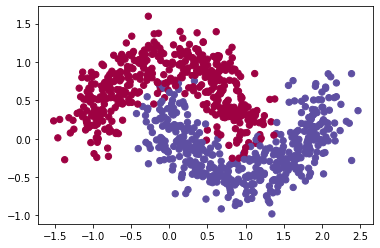

In [ ]:
np.random.seed(3)
train_X, train_Y = sklearn.datasets.make_moons(n_samples=900, noise=.2) #300 #0.2 
# Visualize the data
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
train_X = train_X.T
train_Y = train_Y.reshape((1, train_Y.shape[0]))

**Define the model to be optimized - overview**



-   3 layer neural network model
-   can be run in different optimizer modes: `optimizer` \`\`gd'',\`\`momentum'',\`\`adam''
-   calls
    -   `parameters`  $\leftarrow$ `initialize_parameters(layer_dims)`
    -   sets `optimizer` to `gd` or `momentum` or `adam`
    -   for each mini-batch
    -   `a3, caches` $\leftarrow$  `forward_propagation(minibatch_X, parameters)`
    -   `cost_total` $+=$ `compute_cost(a3, minibatch_Y)`
    -   `grads` $\leftarrow$  `backward_propagation(minibatch_X, minibatch_Y, caches)`
    -   Now update parameters
        -   for \`\`gd '' `parameters` $\leftarrow$ `update_parameters_with_gd(parameters, grads, learning_rate)`
        -   for \`\`momentum'' `parameters` $\leftarrow$ `update_parameters_with_gd(parameters, grads, learning_rate)`
        -   for \`\`adam'' `parameters` $\leftarrow$  `update_parameters_with_adam(parameters, grads, v, s,`   
            `t, learning_rate, beta1, beta2,  epsilon)`
    -   `cost_avg = cost_total / m`



**Define the model to be optimized**



-   3 layer neural network model
-   can be run in different optimizer modes: **optimizer**: `gd`,`momentum`,`adam`



In [ ]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0001, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    
    # Initialize parameters - see further down
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

**Define functions based on ANN section - forward propagation**



-   do this for mini-batch
-   need to define this for python i.e then tensorflow does the backpropagation



In [ ]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss) presented in Figure 2.
    X -- input dataset, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
    loss -- the loss function (vanilla logistic loss)
    """
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
    return a3, cache

**define ReLU sigmoid and cost**



In [ ]:
def relu(x):
    """
    Compute the relu of x
    x -- A scalar or numpy array of any size.
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s

In [ ]:
def sigmoid(x):
    """
    Compute the sigmoid of x
    x -- A scalar or numpy array of any size.
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [ ]:
def compute_cost(a3, Y):
    
    """
    Implement the cost function

    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3

    cost - value of the cost function without dividing by number of training examples

    """
    
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost_total =  np.sum(logprobs)
    
    return cost_total

**Define backward propagation**



-   here to demonstrate the method - is fixed for 2 hidden layers



In [ ]:
def backward_propagation(X, Y, cache):
    """

    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    cache -- cache output from forward_propagation()
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

**Define function to predict**



-   for visualization



In [ ]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  n-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    # print results

    #print ("predictions: " + str(p[0,:]))
    #print ("true labels: " + str(y[0,:]))
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p

**define the function to plot the decision boundary**



In [ ]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y[0], cmap=plt.cm.Spectral)
    plt.show()

**define the function to determine the decision boundary**



-   called as a function  `plot_decision_boundary(model, X, y)`



In [ ]:
def predict_dec(parameters, X):
    """
    Used for plotting decision boundary.
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3 > 0.5)
    return predictions

**Define the function initialize the parameters**



-   slightly different then the initialize test above - here only pass the layer dimensions



In [ ]:
def initialize_parameters(layer_dims):
    """
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b1 -- bias vector of shape (layer_dims[l], 1)
                    Wl -- weight matrix of shape (layer_dims[l-1], layer_dims[\ell])
                    bl -- bias vector of shape (1, layer_dims[l])
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert parameters['W' + str(l)].shape[0] == layer_dims[l], layer_dims[l-1]
        assert parameters['W' + str(l)].shape[0] == layer_dims[l], 1
        
    return parameters

#### Mini-Batch Gradient Descent



-   train 3-layer model
-   use a fixed learning rate  `learning_rate` and default batch size of 64
-   shows that adams is best



Cost after epoch 0: 0.708957
Cost after epoch 1000: 0.689856
Cost after epoch 2000: 0.674583
Cost after epoch 3000: 0.660317
Cost after epoch 4000: 0.644988
Cost after epoch 5000: 0.628934
Cost after epoch 6000: 0.613464
Cost after epoch 7000: 0.599140
Cost after epoch 8000: 0.585864
Cost after epoch 9000: 0.574138


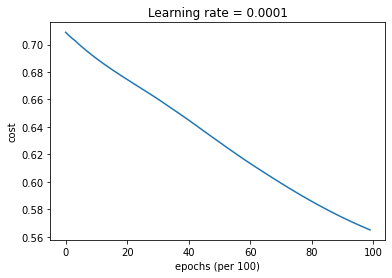

In [ ]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd", learning_rate = 0.0001)

Predict



In [ ]:
predictions = predict(train_X, train_Y, parameters)

Accuracy: 0.6966666666666667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


**Plot decision boundary**



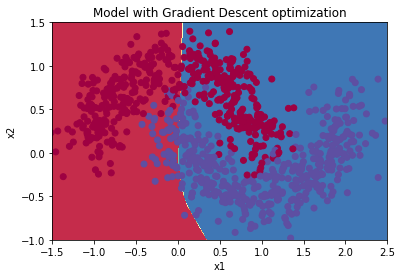

In [ ]:
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

#### Mini-Batch Gradient Descent with Momentum



Train 3-layer model



Cost after epoch 0: 0.708929
Cost after epoch 1000: 0.564182
Cost after epoch 2000: 0.484787
Cost after epoch 3000: 0.340601
Cost after epoch 4000: 0.303625
Cost after epoch 5000: 0.288081
Cost after epoch 6000: 0.279455
Cost after epoch 7000: 0.274312
Cost after epoch 8000: 0.270760
Cost after epoch 9000: 0.268072


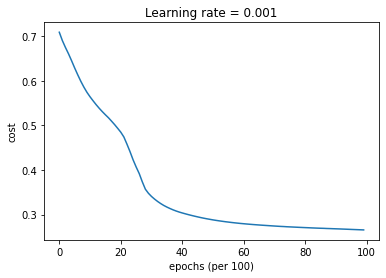

In [ ]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum", learning_rate = 0.001)

#### Mini-Batch Gradient Descent with Momentum



Train 3-layer model



Cost after epoch 0: 0.708929
Cost after epoch 1000: 0.564182
Cost after epoch 2000: 0.484787
Cost after epoch 3000: 0.340601
Cost after epoch 4000: 0.303625
Cost after epoch 5000: 0.288081
Cost after epoch 6000: 0.279455
Cost after epoch 7000: 0.274312
Cost after epoch 8000: 0.270760
Cost after epoch 9000: 0.268072


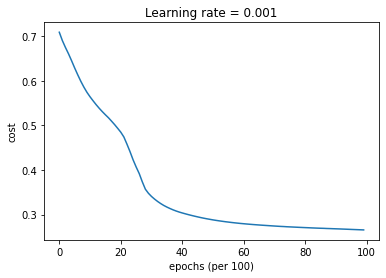

In [ ]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum", learning_rate = 0.001)

Predict



In [ ]:
predictions = predict(train_X, train_Y, parameters)

Accuracy: 0.8711111111111111


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Plot decision boundary



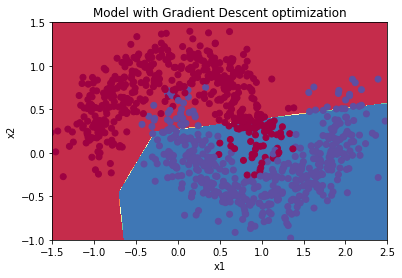

In [ ]:
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

#### Mini-Batch with Adam



Train 3-layer model



Cost after epoch 0: 0.708704
Cost after epoch 1000: 0.351748
Cost after epoch 2000: 0.171266
Cost after epoch 3000: 0.103406
Cost after epoch 4000: 0.084691
Cost after epoch 5000: 0.076711
Cost after epoch 6000: 0.070845
Cost after epoch 7000: 0.068257
Cost after epoch 8000: 0.066774
Cost after epoch 9000: 0.065833


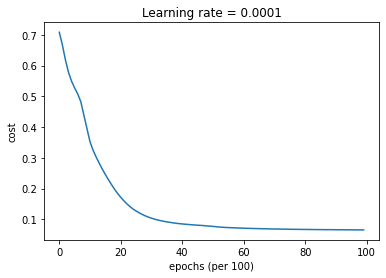

In [ ]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

Predict



In [ ]:
predictions = predict(train_X, train_Y, parameters)

Accuracy: 0.9688888888888889


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


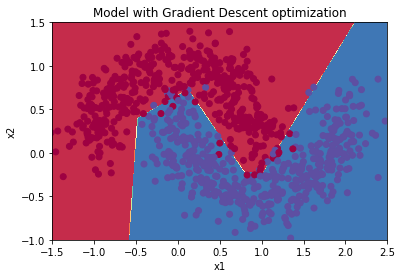

In [ ]:
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### Learning Rate Decay and Scheduling



-   Lastly, the learning rate is another hyperparameter that can help you speed up learning.
-   During the first part of training,
    -   your model can get away with taking large steps,
    -   but over time, using a fixed value for the learning rate alpha can cause your model to get stuck in a wide oscillation that never quite converges.
-   But if you were to slowly reduce your learning rate alpha over time,
    -   you could then take smaller, slower steps that bring you closer to the minimum.
-   This is the idea behind learning rate decay.



**Learning Rate Decay and Scheduling**



-   Learning rate decay can be achieved by using either
    -   adaptive methods or
    -   pre-defined learning rate schedules.
-   Now, you'll apply scheduled learning rate decay to
    -   a 3-layer neural network in three different optimizer modes and see how each one differs,
    -   as well as the effect of scheduling at different epochs.
-   This model is essentially the same as the one you used before,
    -   except in this one you'll be able to include learning rate decay.
    -   It includes two new parameters, decay and decay<sub>rate</sub>.



**Define the model**



-   the argument `decay` can be `None` or a function: `update_lr`



In [ ]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0001, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True, decay=None, decay_rate=1):

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    lr_rates = []
    learning_rate0 = learning_rate   # the original learning rate
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        if decay:
            learning_rate = decay(learning_rate0, i, decay_rate)
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
            if decay:
                print("learning rate after epoch %i: %f"%(i, learning_rate))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

#### Decay on every iteration



For this portion 

-   try one of the predefined schedules for learning rate decay, called exponential learning rate decay.
-   It takes this mathematical form:

$$\alpha = \left( \frac{1}{1 + \text{decayRate} \times \text{epochNumber}}\right) \alpha_{0}$$

-   Calculate the new learning rate using exponential weight decay.



In [ ]:
def update_lr(learning_rate0, epoch_num, decay_rate):

    learning_rate = learning_rate0 * (1 / (1+decay_rate*epoch_num))
    
    return learning_rate

In [ ]:
learning_rate = 0.5
print("Original learning rate: ", learning_rate)
epoch_num = 2
decay_rate = 1
learning_rate_2 = update_lr(learning_rate, epoch_num, decay_rate)

print("Updated learning rate: ", learning_rate_2)

Original learning rate:  0.5
Updated learning rate:  0.16666666666666666


**Train 3-layer model**



Cost after epoch 0: 0.681733
learning rate after epoch 0: 0.500000
Cost after epoch 1000: 0.298565
learning rate after epoch 1000: 0.000500
Cost after epoch 2000: 0.293120
learning rate after epoch 2000: 0.000250
Cost after epoch 3000: 0.290257
learning rate after epoch 3000: 0.000167
Cost after epoch 4000: 0.288443
learning rate after epoch 4000: 0.000125


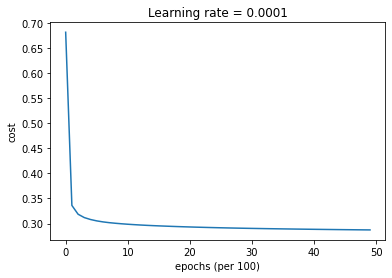

In [ ]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd", learning_rate = 0.5, num_epochs=5000, decay=update_lr)

In [ ]:
predictions = predict(train_X, train_Y, parameters)

Accuracy: 0.8733333333333333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Plot decision boundary



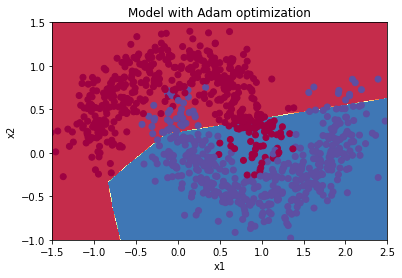

In [ ]:
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

#### Fixed Interval Scheduling



Calculate the new learning rate using exponential weight decay with fixed interval scheduling.

-   Important: Implement the learning rate scheduling such that it only changes when the `epochNum` is a multiple of the time interval.
-   Note the fraction in the denominator uses the floor operation.

$$\alpha = \left( \frac{1}{1 + \text{decayRate} \times \lfloor\frac{\text{epochNum}}{\text{timeInterval}}\rfloor}\right) \alpha_{0}$$



In [ ]:
def schedule_lr_decay(learning_rate0, epoch_num, decay_rate, time_interval=1000):

    learning_rate = learning_rate0 * ( 1 / (1+decay_rate * (np.floor(epoch_num / time_interval))))

    return learning_rate

In [ ]:
learning_rate = 0.5
print("Original learning rate: ", learning_rate)

epoch_num_1 = 10
epoch_num_2 = 100
decay_rate = 0.3
time_interval = 100
learning_rate_1 = schedule_lr_decay(learning_rate, epoch_num_1, decay_rate, time_interval)
learning_rate_2 = schedule_lr_decay(learning_rate, epoch_num_2, decay_rate, time_interval)
print("Updated learning rate after {} epochs: ".format(epoch_num_1), learning_rate_1)
print("Updated learning rate after {} epochs: ".format(epoch_num_2), learning_rate_2)

Original learning rate:  0.5
Updated learning rate after 10 epochs:  0.5
Updated learning rate after 100 epochs:  0.3846153846153846


#### Using Learning Rate Decay for each Optimization Method



Train 3-layer model



Cost after epoch 0: 0.708009
learning rate after epoch 0: 0.010000
Cost after epoch 1000: 0.265693
learning rate after epoch 1000: 0.005000
Cost after epoch 2000: 0.121868
learning rate after epoch 2000: 0.003333
Cost after epoch 3000: 0.086987
learning rate after epoch 3000: 0.002500
Cost after epoch 4000: 0.080449
learning rate after epoch 4000: 0.002000
Cost after epoch 5000: 0.077694
learning rate after epoch 5000: 0.001667
Cost after epoch 6000: 0.076160
learning rate after epoch 6000: 0.001429
Cost after epoch 7000: 0.075159
learning rate after epoch 7000: 0.001250
Cost after epoch 8000: 0.074545
learning rate after epoch 8000: 0.001111
Cost after epoch 9000: 0.074132
learning rate after epoch 9000: 0.001000


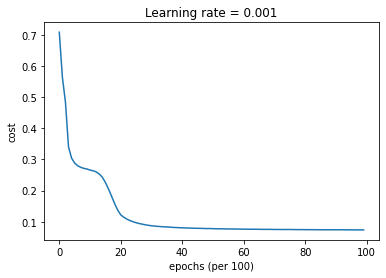

In [ ]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd", learning_rate = 0.01, num_epochs=10000, decay=schedule_lr_decay)

Predict



In [ ]:
predictions = predict(train_X, train_Y, parameters)

Accuracy: 0.9666666666666667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Plot decision boundary



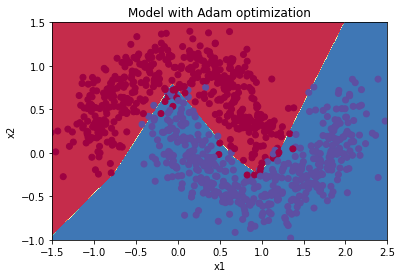

In [ ]:
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Train 3-layer model



Cost after epoch 0: 0.708592
learning rate after epoch 0: 0.010000
Cost after epoch 1000: 0.266038
learning rate after epoch 1000: 0.005000
Cost after epoch 2000: 0.125154
learning rate after epoch 2000: 0.003333
Cost after epoch 3000: 0.087439
learning rate after epoch 3000: 0.002500
Cost after epoch 4000: 0.080456
learning rate after epoch 4000: 0.002000


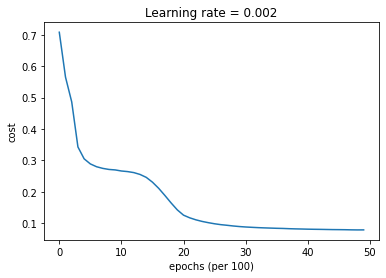

In [ ]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "momentum", learning_rate = 0.01, num_epochs=5000, decay=schedule_lr_decay)

Predict



In [ ]:
predictions = predict(train_X, train_Y, parameters)

Accuracy: 0.9666666666666667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Plot decision boundary



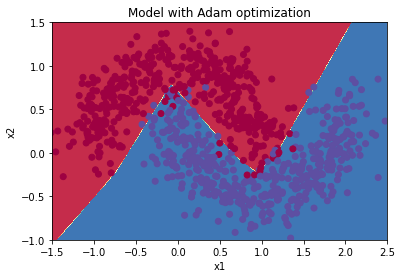

In [ ]:
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Train 3-layer model



Cost after epoch 0: 0.706460
learning rate after epoch 0: 0.001000
Cost after epoch 1000: 0.067096
learning rate after epoch 1000: 0.000500
Cost after epoch 2000: 0.064556
learning rate after epoch 2000: 0.000333
Cost after epoch 3000: 0.063652
learning rate after epoch 3000: 0.000250
Cost after epoch 4000: 0.063149
learning rate after epoch 4000: 0.000200


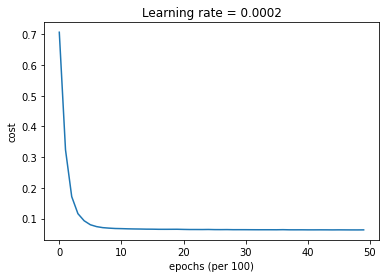

In [ ]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam", learning_rate = 0.001, num_epochs=5000, decay=schedule_lr_decay)

Predict



In [ ]:
predictions = predict(train_X, train_Y, parameters)

Accuracy: 0.9677777777777777


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Plot decision boundary



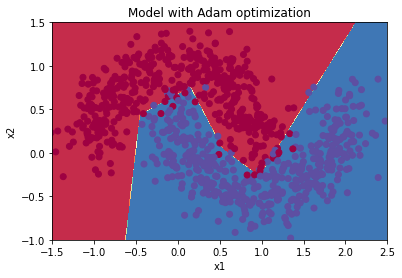

In [ ]:
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### Reference
[1] Géron, Aurélien. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.", 2019.

[2] [Deep Learning Specialization](https://www.coursera.org/specializations/deep-learning?utm_source=gg&utm_medium=sem&utm_content=01-CatalogDSA-ML1-US&campaignid=12490862811&adgroupid=119269357576&device=c&keyword=&matchtype=&network=g&devicemodel=&adpostion=&creativeid=503940597773&hide_mobile_promo&gclid=Cj0KCQjw29CRBhCUARIsAOboZbKrZYXRxSAWsf0P8G4fdj873mHaPoHZCogCefimY83uQIQKJWlVmxwaAuH4EALw_wcB)


